In [1]:
grid = [(i, j) for j in range(101) for i in range(101)]


In [2]:
import random 
new_grid=[]
while(len(new_grid)<50):
    a = random.choice(grid)
    if a not in new_grid:
         new_grid.append(a)
print (new_grid)

[(31, 4), (11, 37), (21, 23), (31, 24), (35, 0), (11, 31), (50, 29), (93, 56), (46, 81), (8, 73), (6, 65), (68, 46), (34, 19), (62, 58), (58, 37), (69, 9), (73, 82), (51, 4), (93, 39), (1, 80), (16, 60), (25, 29), (47, 91), (47, 87), (33, 32), (14, 94), (26, 98), (22, 15), (90, 53), (59, 81), (69, 18), (72, 4), (75, 12), (53, 21), (100, 78), (74, 18), (42, 70), (38, 62), (44, 3), (90, 6), (42, 85), (85, 67), (93, 11), (61, 12), (62, 3), (24, 21), (27, 77), (84, 31), (22, 75), (34, 100)]


In [3]:
coordinates = [(68, 54), (63, 68), (36, 58), (80, 43), (8, 68), (65, 45), (71, 16), (73, 40), (8, 8), (41, 29), (29, 55), (48, 51), (69, 16), (1, 27), (25, 75), (5, 81), (82, 81), (16, 75), (6, 1), (4, 41), (68, 98), (20, 95), (40, 13), (21, 80), (34, 0), (54, 39), (21, 37), (84, 73), (53, 52), (76, 61), (54, 48), (24, 0), (33, 29), (29, 61), (15, 95), (40, 10), (96, 42), (27, 47), (5, 0), (44, 88), (88, 31), (70, 35), (30, 57), (70, 58), (39, 85), (6, 99), (99, 87), (71, 98), (14, 39), (13, 85)]

In [4]:
print (coordinates)


[(68, 54), (63, 68), (36, 58), (80, 43), (8, 68), (65, 45), (71, 16), (73, 40), (8, 8), (41, 29), (29, 55), (48, 51), (69, 16), (1, 27), (25, 75), (5, 81), (82, 81), (16, 75), (6, 1), (4, 41), (68, 98), (20, 95), (40, 13), (21, 80), (34, 0), (54, 39), (21, 37), (84, 73), (53, 52), (76, 61), (54, 48), (24, 0), (33, 29), (29, 61), (15, 95), (40, 10), (96, 42), (27, 47), (5, 0), (44, 88), (88, 31), (70, 35), (30, 57), (70, 58), (39, 85), (6, 99), (99, 87), (71, 98), (14, 39), (13, 85)]


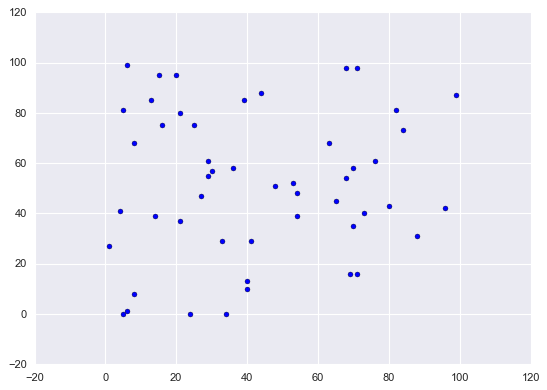

In [82]:
from matplotlib import pyplot as plt
plt.style.use('seaborn')
x=[]
y=[]

for i in range(50):
    z=coordinates[i]
    x.append(z[0])
    y.append(z[1])

plt.scatter(x,y)
plt.show()

In [83]:
#Making Parents

def gen_parents(seed_n) :
    seed = []
    
    for i in range(50):
         seed.append(i) 
            
    
    parents=[]
    for i in range(seed_n):
        random.shuffle(seed)
        if seed not in parents:
            parents.append(seed[::])
    
    return parents 

In [84]:
#fitness function
#Here, Fitness is nothing but the distance between the coordinates
#the numbers in the parents are nothing but the indices pointing to the cities in the coordinates


In [85]:
#making fitness rank function 
#here less rank = more fit

def fitness(chromosome):
    fit=0
    for i in range(49):
        p=chromosome[i]
        q=chromosome[i+1]
        fit += ((x[p]-x[q])**2 + (y[p]-y[q])**2)**(1/(2))
    fit+=((x[q]-x[0])**2 + (y[q]-y[0])**2)**(1/(2))
    return fit

#making manhattan fitness
def mfitness(chromosome):
    fit=0
    for i in range(49):
        p=chromosome[i]
        q=chromosome[i+1]
        fit += (abs(x[p]-x[q]) + abs(y[p]-y[q])) 
    
    return fit


In [86]:
#making crossover function (1 point crossover)
def crossover(chromo1,chromo2):
    p=random.randint(0,49)
    child1=chromo1[:p]
    child2=chromo2[p:]
    for i in range(50):
        if chromo2[i] not in child1 :
            child1.append(chromo2[i])
        if chromo1[i] not in child2 :
            child2.append(chromo1[i])
    return child1,child2

In [87]:
#making mutation
def mutation(chromo1):
    gen_ran_111=list(range(35))
    r_=int(random.choice(gen_ran_111))
    mutated_element = chromo1.pop(r_)
    chromo1.append(mutated_element)
    return chromo1
    


In [88]:
#Reproduction
seed=gen_parents(11)
i_population=seed
no_of_gen= 50
avg_fit=[]
best_fit=[]
for j in range(no_of_gen):
    for i in range(11):
        ran_gen_001=random.randint(0,len(i_population)-1)
        ran_gen_002=random.randint(0,len(i_population)-1)
        kids=crossover(i_population[ran_gen_001],i_population[ran_gen_002])
        i_population.extend(kids)
    i_population.sort(key = lambda x:fitness(x))
    avfit=sum(list(map(fitness,i_population)))/len(i_population)
    avg_fit.append(avfit)
    

#Elimination

    i_population.sort(key = lambda x:fitness(x))
    best_fit.append(fitness(i_population[0]))
    ran_gen_003=random.randint(7,11)
    i_population=i_population[:len(i_population)-(ran_gen_003)]

In [89]:
#results of euclidean fitness
print(len(i_population))
print(i_population[0])
print(fitness(i_population[0]),fitness(i_population[-1]))
fc = i_population[0]

652
[10, 49, 14, 35, 8, 32, 26, 19, 38, 22, 5, 9, 25, 48, 4, 12, 31, 6, 33, 45, 1, 23, 37, 13, 30, 36, 47, 17, 15, 0, 46, 42, 2, 39, 24, 18, 41, 3, 7, 40, 16, 44, 28, 34, 20, 29, 11, 21, 27, 43]
2043.5247711468924 2408.8090515870854


In [90]:
# #Reproduction - manhattan distance
# seed=gen_parents(10)
i_population=seed[::]
no_of_gen= 100

for j in range(no_of_gen):
    for i in range(11):
        ran_gen_001=random.randint(0,len(i_population)-1)
        ran_gen_002=random.randint(0,len(i_population)-1)
        kids=crossover(i_population[ran_gen_001],i_population[ran_gen_002])
        i_population.extend(kids)

# #Elimination

    i_population.sort(key = lambda x:mfitness(x))
    ran_gen_003=random.randint(7,11)
    i_population=i_population[:len(i_population)-(ran_gen_003)]

In [91]:
# #results of manhattan rank fitness
# less fitness rank = more fit
print(len(i_population))
print(i_population[0])
print(mfitness(i_population[0]),mfitness(i_population[-1]))
fc = i_population[0]

1347
[30, 11, 29, 7, 41, 9, 33, 19, 48, 35, 32, 26, 8, 22, 10, 0, 49, 27, 3, 6, 31, 28, 40, 34, 23, 1, 20, 5, 18, 14, 39, 4, 47, 16, 12, 17, 43, 42, 2, 24, 38, 13, 25, 44, 46, 36, 37, 15, 21, 45]
2477 3028


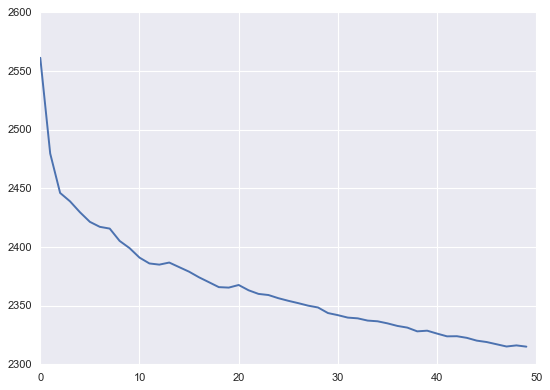

In [92]:
#avg. fitness rank  vs generation
plt.plot(list(range(50)),avg_fit)

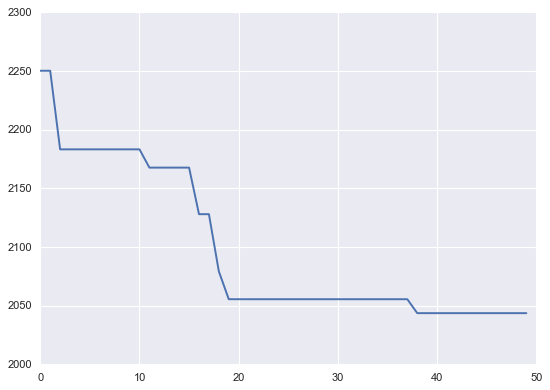

In [93]:
#best fitness rank vs generation
plt.plot(list(range(50)),best_fit)
plt.rcParams['figure.figsize'] = [9,9]

[30, 11, 29, 7, 41, 9, 33, 19, 48, 35, 32, 26, 8, 22, 10, 0, 49, 27, 3, 6, 31, 28, 40, 34, 23, 1, 20, 5, 18, 14, 39, 4, 47, 16, 12, 17, 43, 42, 2, 24, 38, 13, 25, 44, 46, 36, 37, 15, 21, 45]


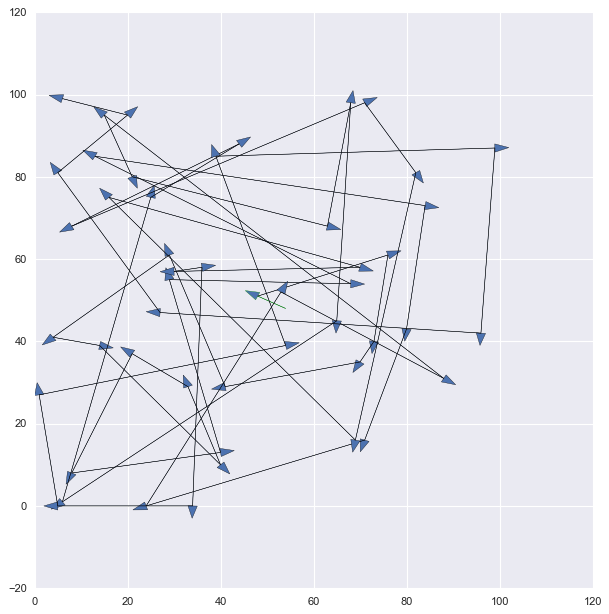

In [94]:
print(fc)
for i in range(49):
    x1 = x[fc[i]]
    y1 = y[fc[i]]
    x2 = x[fc[i+1]]
    y2 = y[fc[i+1]]
    if(i == 0):
        plt.arrow(x1,y1,x2-x1,y2-y1,width=0.05,head_width=2,ec='green')
    else:
        plt.arrow(x1,y1,x2-x1,y2-y1,width=0.05,head_width=2)

2c) One way to I can think of is binary encoding , where in we can assign a binary code to each city.
For example , lets say there are 10 cities. 
We will take 2^4 =16 chromosomes . and assign 001 to city 1 ,010 to city 2  and so on.
However 6 chromosomes will not be assigned anything (Null chromosomes which will not add to fitness functions and simply will be ignored while making the fitness function). And then we can create the crossover functions, fitness functions, reproduction functions for the same chromosome.
I believe applying mutations, masking(which can't be applied in other form of chromosomes) , crossovers to such kind of encoding will result in evolutions which is at par with permutation encoding if not better.

2d ) After checking multiple times the convergence value of avg fitness vs generation converges in the same way , the
values the method of crossover and elimination which i have taken works in such a way that initial population has a drastic evolution due to the bad fitness value (less the fitness value the better it is in my case).

Another interesting fact that we can notice is that once the population evolves upto a certain point, it is not changing much. Infact it is even increasing as due to random mutation and elimination of good genes (after certain point when only good genes remain, the good genes are being eliminated)

However, we can see the best fitness value changes abruptly , this is due to mutation and other random crossovers.
